<a href="https://colab.research.google.com/github/AthirahFauzi02/NeuralComputing7C/blob/main/NC_Assignment7C_Version3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FLAPPY GAME GENERATOR 👾**



### **The Flappy Game Generator takes you on a thrilling journey through three distinct phases:**

1.   In the first part, GPT unleashes its creative power to generate a captivating game overview.
2.   Moving on to the second part, the game's assets come to life as Stable Diffusion combines forces with GPT's output, shaping a truly immersive experience.
3. Finally, the last part reveals the secret sauce—the Flappy Game Code—bringing everything together in a seamless fusion of code and entertainment.



### **Pre-Requirement**
Install GPT4all, Stable Diffusion 2.1 model, pygame and rembg

In [ ]:
!pip install gpt4all

In [ ]:
!pip install diffusers transformers accelerate scipy safetensors

In [ ]:
!pip install pygame

In [ ]:
!pip install rembg

# **GPT PART** 🤖



Import gpt4all

In [ ]:
import gpt4all

Retrieve model



In [ ]:
gptj = gpt4all.GPT4All("ggml-gpt4all-j-v1.3-groovy.bin")

Found model file at  /root/.cache/gpt4all/ggml-gpt4all-j-v1.3-groovy.bin


### **METHOD**

There are 4 methods in GPT phase :-



*   ***playmusic***() 🎵

    This method is created to infuse an element of excitement by integrating music while users provide their prompts to GPT for game creation, ensuring an engaging and enjoyable experience.



---



*   ***typewriter***() ✍

    The purpose of this method is to offer users an introductory experience to game creation. It involves presenting an animated introduction message, complete with a typewriter effect.


---


*   ***prompt_gpt***() 🦸

    Within this function, its purpose is to refine the prompt that will be fed into the GPT4All model. The user's input is modified with additional commands such as "describe without introduction" or "please do not provide any code," ensuring that the prompt aligns with the specific requirements of the game.

    To accommodate the token limitation of GPT4All, we include a concise game description in bullet point format. This allows GPT to generate output that aligns with the description, facilitating the information extraction during stable diffusion. Essentially, we request GPT to generate the character, background, and obstacles of the game based on user input. This approach aids GPT in producing output that precisely focuses on the desired game elements, ensuring a tailored game experience.

---

*   ***extract_information***() ℹ

    In this method, our goal is to extract information from the output generated by GPT. We achieve this by defining variables such as title, background, desc, and obstacles, which serve as variables to store the extracted data. The process involves utilizing regex to search for specific patterns within the output string. When a match is found, we assign the corresponding value to the respective variable. Finally, we return the extracted information as title, background, desc, and obstacles to be used in Stable Diffusion part.




In [ ]:
import sys,time,os
import pygame
from IPython.display import Audio, display
from rich import print
import re


def playmusic():
  music = Audio('/content/Free Epic Music.mp3')
  display(music)


def typewriter(message):
  for char in message:
    sys.stdout.write(char)
    sys.stdout.flush()
    if char!="\n":
      time.sleep(0.05)
    else:
      time.sleep(1)


def prompt_gpt():
    output = ""
    intro_remove = "Describe without introduction."
    no_code = "Please do not provide any code."
    game_type = "\nThe game should be like flappy bird game type."
    game_description ="""Generate a game description with the following details:
    Title of the game:
    Background wallpaper of the game:
    Description of main character:
    Obstacle: """

    print('\n\nGenerate Your Game Buddy!')
    user_input = input(">>> ")
    if user_input.lower() != 'q':
        prompt = intro_remove + " " + no_code + "\n" + user_input + "\n" + game_description + game_type
        messages = [{"role": "user", "content": prompt}]
        response = gptj.chat_completion(messages)
        output = response['choices'][0]['message']['content']

    return output


def extract_information(string_gpt):
    title_match = re.search(r'Title of the game(:| is) (.*?)\n(?=.)', string_gpt)
    background_match = re.search(r'Background wallpaper of the game(:| is) (.*?)\n(?=.)', string_gpt)
    desc_match = re.search(r'Description of main character(:| is) (.*?)\n(?=.)', string_gpt, re.DOTALL)
    obstacles_match = re.search(r'Obstacle(:| is) (.*?)\.', string_gpt)

    if title_match:
      title = title_match.group(2).strip()
    else:
        title = ""


    if background_match:
        background = background_match.group(2).strip()
    else:
        background = ""


    if desc_match:
        desc = desc_match.group(2).strip()
    else:
        desc = ""


    if obstacles_match:
      obstacles = obstacles_match.group(2).strip()
    else:
      obstacles = ""

    return title,background,desc,obstacles




Play the background music 👇

In [ ]:
# Play the music
playmusic()

User Input ✍

In [ ]:



print('''                            ☆ （ • •）☆
                               ╔uu══════════════════╗☆
                                  WELCOME TO FLAPPY
                                    GAME GENERATOR
                               ╚══════nn════════════╝''')

message = "\nAttention gamers! Your dream game awaits, and we're here to bring it to life.\nImagine a world where your creative vision is transformed into a captivating reality.\nFrom breathtaking visuals to immersive gameplay, we'll craft an experience that exceeds your expectations.\nWith close collaboration and your valuable input, together we'll embark on an unforgettable journey to redefine the gaming landscape.\nGet ready to see your dreams become a gaming masterpiece.\nYour game awaits!"
typewriter(message)
gpt_prompt = prompt_gpt()

☆ （ • •）☆
                               ╔uu══════════════════╗☆
                                  WELCOME TO FLAPPY
                                    GAME GENERATOR
                               ╚══════nn════════════╝


Attention gamers! Your dream game awaits, and we're here to bring it to life.
Imagine a world where your creative vision is transformed into a captivating reality.
From breathtaking visuals to immersive gameplay, we'll craft an experience that exceeds your expectations.
With close collaboration and your valuable input, together we'll embark on an unforgettable journey to redefine the gaming landscape.
Get ready to see your dreams become a gaming masterpiece.
Your game awaits!

Generate Your Game Buddy!

>>> create a game with bee theme
### Instruction: 
            The prompt below is a question to answer, a task to complete, or a conversation 
            to respond to; decide which and write an appropriate response.
            
### Prompt: 
Describe without introduction. Please do not provide any code.
create a game with bee theme
Generate a game description with the following details:
    Title of the game:
    Background wallpaper of the game:
    Description of main character:
    Obstacle: 
The game should be like flappy bird game type.
### Response:
 
Title of the game: "Bee's Adventures"
Background wallpaper of the game: A colorful and vibrant bee hive background.
Description of main character: A bee named Bee, who is the main protagonist of the game.
Obstacle: A swarm of bees that the player must navigate through to reach their goal.
Game mechanics: The player must use their bee-like abilities to fly, collect honey and avoid obstacles.
Controls: The player can use the arrow 

Extract information from GPT output

In [ ]:
t, background_prompt, character_prompt, obstacle_prompt = extract_information(gpt_prompt)
print("\n",t)
background_prompt = (background_prompt)
# main_char = print("\n",c)
character_prompt = (character_prompt)
obstacle_prompt = (obstacle_prompt)

print(background_prompt)
print(character_prompt)
print(obstacle_prompt)


"Bee's Adventures"

A colorful and vibrant bee hive background.

A bee named Bee, who is the main protagonist of the game.

A swarm of bees that the player must navigate through to reach their goal

# **Stable Diffusion** 📺

Next, we import torch and Stable Diffusion. We use Stable Diffusion version 2.1 as it is the latest text-to-image model by StabilityAI.

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

Here we import the necessary libraries for image visualization once it has been generated.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

We define a function here,
*   ***generate_and_save_image***()📸

    This method generate image with Stable Diffusion by using previous output from GPT as the prompt. Simple as it is, we allow the user to choose the style  and type of the image that they want to use. This user input will be used by the function to generate the desired style or type of images. The image generated was saved locally for further editing before it can be used as our game assets.

Choose the style or type of the images:

1. Oil painting

2. Watercolor painting

3. Pencil sketch

4. Pixel art

5. Realistic

Enter the corresponding number for your choice: 5


A bee named Bee, who is the main protagonist of the game.
style: Realistic

  0%|          | 0/50 [00:00<?, ?it/s]

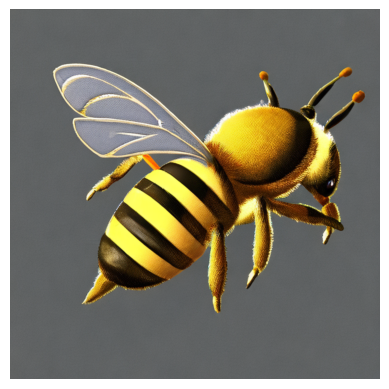

A colorful and vibrant bee hive background.
style: Realistic

  0%|          | 0/50 [00:00<?, ?it/s]

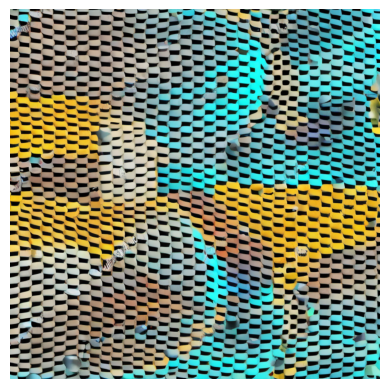

A swarm of bees that the player must navigate through to reach their goal
style: Realistic

  0%|          | 0/50 [00:00<?, ?it/s]

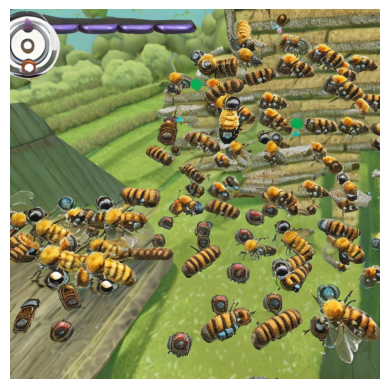

In [ ]:
def generate_and_save_image(prompt, style_choice, filename):
    prompt_with_style = f"{prompt}\nstyle: {style_choice}"
    print(prompt_with_style)
    image = pipe(prompt_with_style).images[0]
    image.save(filename)

    image_array = np.array(image)
    plt.imshow(image_array)
    plt.axis('off')
    plt.show()

# User input for choosing the style or type of the images
print("Choose the style or type of the images:")
print("1. Oil painting")
print("2. Watercolor painting")
print("3. Pencil sketch")
print("4. Pixel art")
print("5. Realistic")
style_choice = input("Enter the corresponding number for your choice: ")

if style_choice == "1":
    style = "oil painting"
elif style_choice == "2":
    style = "watercolor painting"
elif style_choice == "3":
    style = "pencil sketch"
elif style_choice == "4":
    style = "Pixel art"
elif style_choice == "5":
    style = "Realistic"
else:
    print("Invalid choice. Using default style.")

generate_and_save_image(character_prompt, style, "game_character.png")
generate_and_save_image(background_prompt, style, "game_background.png")
generate_and_save_image(obstacle_prompt, style, "game_obstacle.png")



Here, we do further editing to the images generated.

* Libaries like rembg and PIL are needed as we want to remove the background of the image generated so our game is nice to look at.

* ***remove_bg***() ✂

    In this method, we took the image generated previously and process it to remove the background or the negative spaces around the image. The processed image was then save again locally to be used later in the game.

In [ ]:
# Importing Required Modules
from rembg import remove
from PIL import Image
import numpy as np

def remove_bg(image, output):
  # Store path of the image in the variable input_path
  input_path = image

  # Store path of the output image in the variable output_path
  output_path = '/content/'+ output +'.png'

  # Processing the image
  input = Image.open(input_path)

  # Removing the background from the given Image
  output = remove(input)

  #Saving the image in the given path
  output.save(output_path)
  return output

Here, we called the function defined above and store it in a variable as we want to visualize it here in Colab. It is not necessary to store the function in a variable, but we just want to show the output of the processed image here.

In [ ]:
game_char = remove_bg("game_character.png", "game_character_rem")


This is where we visualized the processed image. Visualizing using matplotlib make the image has a white background when in fact the background is completely transparent and we can only see the image or bee in this case. If you want to see the actual processed image, you can refer to Files and find the location of the processed image.

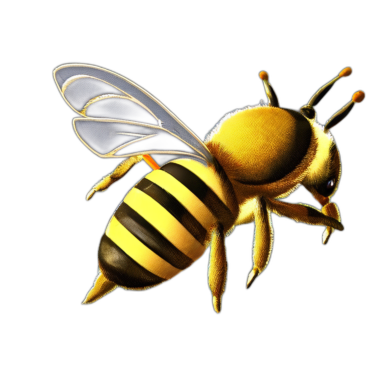

In [ ]:
image_array = np.array(game_char)
plt.imshow(image_array)
plt.axis('off')
plt.show()

# image_array = np.array(game_obs)
# plt.imshow(image_array)
# plt.axis('off')
# plt.show()

This is the final step of editing the generated image. We defined a function here as  below:

* ***resize_image***()📐

    The purpose of this method is to resize the image to the size that we want. Because the size image generated is not always to our liking, we can use this method to resize it. We can stretch it vertically or horizontally, depends on the use of the image as an asset to the game.

In [ ]:
from google.colab import files
import shutil

def resize_image(input_image_path,output_image_path,size):
    original_image = Image.open(input_image_path)
    width, height = original_image.size
    print(f"The original image size is {width} wide x {height} high")

    resized_image = original_image.resize(size)
    width, height = resized_image.size
    print(f"The resized image size is {width} wide x {height} high")
    resized_image.save(output_image_path)

resize_image('game_character_rem.png', 'game_character_resize.png', (51, 36))
resize_image('game_obstacle.png', 'game_obstacle_resize.png', (150, 560))



masukkan dalam code game semua gambar tu

In [ ]:
# import pygame

# from pygame.locals import *
# import random

# pygame.init()

# clock = pygame.time.Clock()
# fps = 60

# screen_width = 764
# screen_height = 836

# screen = pygame.display.set_mode((screen_width, screen_height))
# pygame.display.set_caption('Flappy Bird')

# #define font
# font = pygame.font.SysFont('Bauhaus 93', 60)

# #define colours
# white = (255, 255, 255)

# #define game variables
# ground_scroll = 0
# scroll_speed = 4
# flying = False
# game_over = False
# pipe_gap = 150
# pipe_frequency = 1500 #milliseconds
# last_pipe = pygame.time.get_ticks() - pipe_frequency
# score = 0
# pass_pipe = False


# #load images
# bg = pygame.image.load('/content/game_background.png')
# ground_img = pygame.image.load('C:\\Users\\user\\OneDrive\\Documents\\Neural Computing Assignment\\flappy_bird-main\\flappy_bird-main\\img\\ground.png')
# button_img = pygame.image.load('C:\\Users\\user\\OneDrive\\Documents\\Neural Computing Assignment\\flappy_bird-main\\flappy_bird-main\\img\\restart.png')


# #function for outputting text onto the screen
# def draw_text(text, font, text_col, x, y):
# 	img = font.render(text, True, text_col)
# 	screen.blit(img, (x, y))

# def reset_game():
# 	pipe_group.empty()
# 	flappy.rect.x = 100
# 	flappy.rect.y = int(screen_height / 2)
# 	score = 0
# 	return score


# class Bird(pygame.sprite.Sprite):

# 	def __init__(self, x, y):
# 		pygame.sprite.Sprite.__init__(self)
# 		self.images = []
# 		self.index = 0
# 		self.counter = 0
# 		for num in range (1, 4):
# 			img = pygame.image.load(f"C:\\Users\\user\\OneDrive\\Documents\\Neural Computing Assignment\\flappy_bird-main\\flappy_bird-main\\img\\bird{num}.png")
# 			self.images.append(img)
# 		self.image = self.images[self.index]
# 		self.rect = self.image.get_rect()
# 		self.rect.center = [x, y]
# 		self.vel = 0
# 		self.clicked = False

# 	def update(self):

# 		if flying == True:
# 			#apply gravity
# 			self.vel += 0.5
# 			if self.vel > 8:
# 				self.vel = 8
# 			if self.rect.bottom < 768:
# 				self.rect.y += int(self.vel)

# 		if game_over == False:
# 			#jump
# 			if pygame.mouse.get_pressed()[0] == 1 and self.clicked == False:
# 				self.clicked = True
# 				self.vel = -10
# 			if pygame.mouse.get_pressed()[0] == 0:
# 				self.clicked = False

# 			#handle the animation
# 			flap_cooldown = 5
# 			self.counter += 1

# 			if self.counter > flap_cooldown:
# 				self.counter = 0
# 				self.index += 1
# 				if self.index >= len(self.images):
# 					self.index = 0
# 				self.image = self.images[self.index]


# 			#rotate the bird
# 			self.image = pygame.transform.rotate(self.images[self.index], self.vel * -2)
# 		else:
# 			#point the bird at the ground
# 			self.image = pygame.transform.rotate(self.images[self.index], -90)



# class Pipe(pygame.sprite.Sprite):

# 	def __init__(self, x, y, position):
# 		pygame.sprite.Sprite.__init__(self)
# 		self.image = pygame.image.load("C:\\Users\\user\\OneDrive\\Documents\\Neural Computing Assignment\\flappy_bird-main\\flappy_bird-main\\img\\athirah2.png")
# 		self.rect = self.image.get_rect()
# 		#position variable determines if the pipe is coming from the bottom or top
# 		#position 1 is from the top, -1 is from the bottom
# 		if position == 1:
# 			self.image = pygame.transform.flip(self.image, False, True)
# 			self.rect.bottomleft = [x, y - int(pipe_gap / 2)]
# 		elif position == -1:
# 			self.rect.topleft = [x, y + int(pipe_gap / 2)]


# 	def update(self):
# 		self.rect.x -= scroll_speed
# 		if self.rect.right < 0:
# 			self.kill()



# class Button():
# 	def __init__(self, x, y, image):
# 		self.image = image
# 		self.rect = self.image.get_rect()
# 		self.rect.topleft = (x, y)

# 	def draw(self):
# 		action = False

# 		#get mouse position
# 		pos = pygame.mouse.get_pos()

# 		#check mouseover and clicked conditions
# 		if self.rect.collidepoint(pos):
# 			if pygame.mouse.get_pressed()[0] == 1:
# 				action = True

# 		#draw button
# 		screen.blit(self.image, (self.rect.x, self.rect.y))

# 		return action



# pipe_group = pygame.sprite.Group()
# bird_group = pygame.sprite.Group()

# flappy = Bird(100, int(screen_height / 2))

# bird_group.add(flappy)

# #create restart button instance
# button = Button(screen_width // 2 - 50, screen_height // 2 - 100, button_img)


# run = True
# while run:

# 	clock.tick(fps)

# 	#draw background
# 	screen.blit(bg, (0,0))

# 	pipe_group.draw(screen)
# 	bird_group.draw(screen)
# 	bird_group.update()

# 	#draw and scroll the ground
# 	screen.blit(ground_img, (ground_scroll, 768))

# 	#check the score
# 	if len(pipe_group) > 0:
# 		if bird_group.sprites()[0].rect.left > pipe_group.sprites()[0].rect.left\
# 			and bird_group.sprites()[0].rect.right < pipe_group.sprites()[0].rect.right\
# 			and pass_pipe == False:
# 			pass_pipe = True
# 		if pass_pipe == True:
# 			if bird_group.sprites()[0].rect.left > pipe_group.sprites()[0].rect.right:
# 				score += 1
# 				pass_pipe = False
# 	draw_text(str(score), font, white, int(screen_width / 2), 20)


# 	#look for collision
# 	if pygame.sprite.groupcollide(bird_group, pipe_group, False, False) or flappy.rect.top < 0:
# 		game_over = True
# 	#once the bird has hit the ground it's game over and no longer flying
# 	if flappy.rect.bottom >= 768:
# 		game_over = True
# 		flying = False


# 	if flying == True and game_over == False:
# 		#generate new pipes
# 		time_now = pygame.time.get_ticks()
# 		if time_now - last_pipe > pipe_frequency:
# 			pipe_height = random.randint(-100, 100)
# 			btm_pipe = Pipe(screen_width, int(screen_height / 2) + pipe_height, -1)
# 			top_pipe = Pipe(screen_width, int(screen_height / 2) + pipe_height, 1)
# 			pipe_group.add(btm_pipe)
# 			pipe_group.add(top_pipe)
# 			last_pipe = time_now

# 		pipe_group.update()

# 		ground_scroll -= scroll_speed
# 		if abs(ground_scroll) > 35:
# 			ground_scroll = 0


# 	#check for game over and reset
# 	if game_over == True:
# 		if button.draw():
# 			game_over = False
# 			score = reset_game()


# 	for event in pygame.event.get():
# 		if event.type == pygame.QUIT:
# 			run = False
# 		if event.type == pygame.MOUSEBUTTONDOWN and flying == False and game_over == False:
# 			flying = True

# 	pygame.display.update()

# pygame.quit()


User dapat main game